# MovieLens Project Use Case

#  Importing Libraries

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#   Importing Movies, Ratings and Users Datasets

In [2]:
movies = pd.read_csv('movies.dat', sep='::', header=None, names=['MovieID','MovieName','Genre'])
ratings = pd.read_csv('ratings.dat', sep='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
users = pd.read_csv('users.dat', sep='::', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-Code'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from th

#  check for the missing values

In [3]:
print(movies.info(),users.info(), ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID      3883 non-null int64
MovieName    3883 non-null object
Genre        3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zip-Code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB
None None None


# Perform the Exploratory Data Analysis (EDA) for the users dataset

#  Visualize user age distribution 

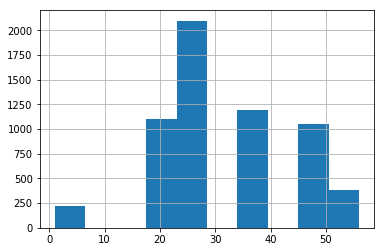

In [4]:
users.Age.hist()

#  Visualize overall rating by users

In [5]:
overallRating = ratings.groupby('UserID').Rating.count()

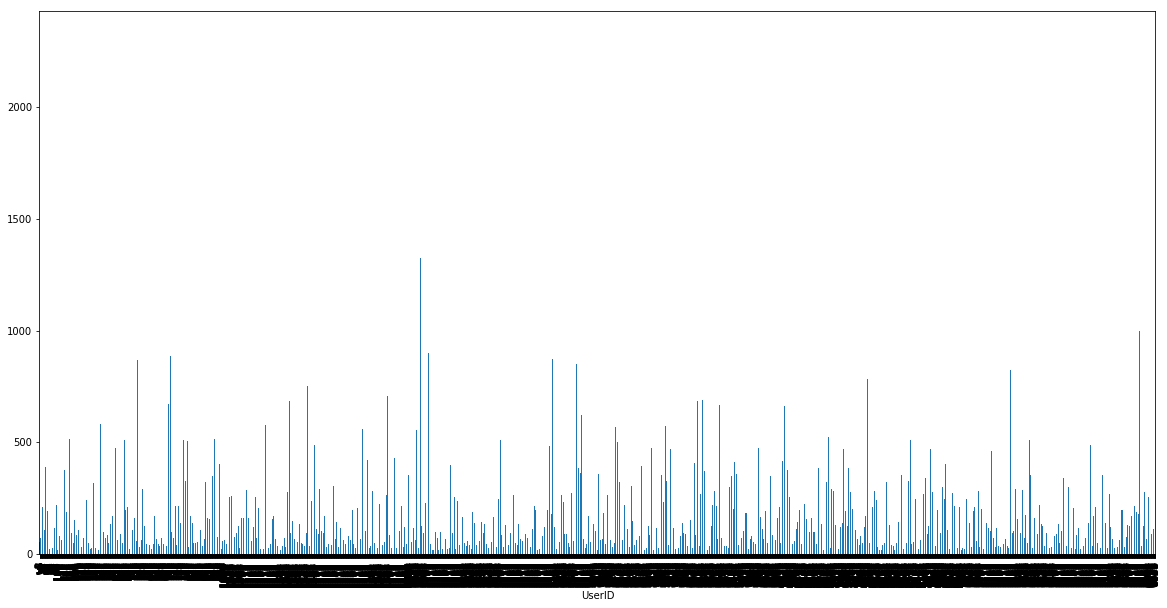

In [26]:
overallRating.plot(kind='bar', figsize=(20,10))

#  Find and visualize the user rating of the movie “Toy Story (1995)”

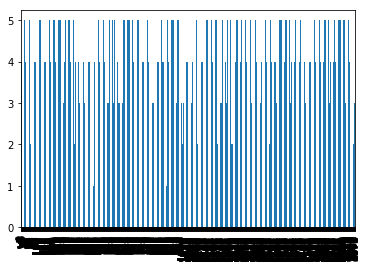

In [25]:
masterData = pd.merge(movies, ratings)

masterData.Rating[masterData.MovieName == 'Toy Story (1995)'].plot(kind='bar')

#  Find and visualize the viewership of the movie “Toy Story (1995)” by age group

In [77]:
viewers = pd.merge(users, ratings)

In [78]:
master_viewers = pd.merge(viewers, movies)

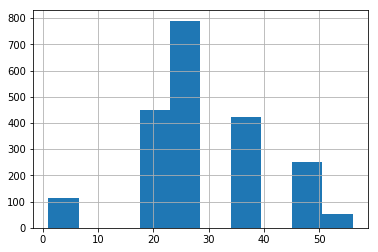

In [83]:
master_viewers[master_viewers.MovieName == 'Toy Story (1995)'].iloc[:,2].hist()

#  Find and visualize the top 25 movies by viewership rating

In [111]:
result = master_viewers.groupby('MovieName').count()

In [117]:
result = result.sort_values(by='Rating', ascending=False).head(25)

In [123]:
result.iloc[:,-3]

MovieName
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               236

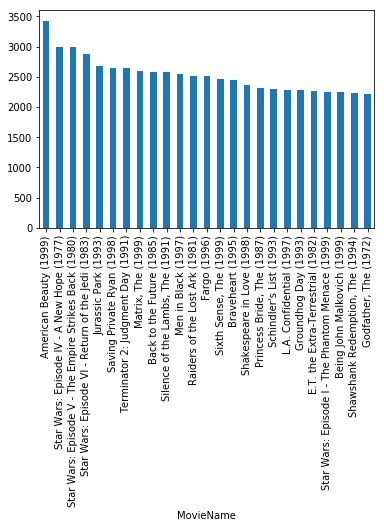

In [124]:
result.iloc[:,-3].plot(kind='bar')

#  Find the rating for a particular user of user id = 2696

In [127]:
master_viewers.head()

,UserID,Gender,Age,Occupation,Zip-Code,MovieID,Rating,Timestamp,MovieName,Genre
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [147]:
result = master_viewers[master_viewers.UserID == 2696].iloc[:,[6,8]]

In [149]:
result

,Rating,MovieName
24345,2,Back to the Future (1985)
29848,3,E.T. the Extra-Terrestrial (1982)
244232,4,L.A. Confidential (1997)
250014,5,Lone Star (1996)
273633,1,JFK (1991)
277808,4,"Talented Mr. Ripley, The (1999)"
371178,4,Midnight in the Garden of Good and Evil (1997)
377250,3,Cop Land (1997)
598042,4,Palmetto (1998)
603189,4,"Perfect Murder, A (1998)"


#  Visualize the rating data by user of user id = 2696

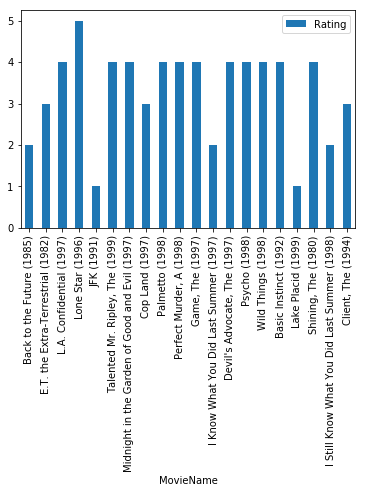

In [148]:
result.plot(x='MovieName', y='Rating', kind='bar')

# Perform machine learning on first 500 extracted records

In [3]:
dataset = pd.merge(users,ratings)

In [4]:
dataset = dataset.head(500)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
UserID        500 non-null int64
Gender        500 non-null object
Age           500 non-null int64
Occupation    500 non-null int64
Zip-Code      500 non-null object
MovieID       500 non-null int64
Rating        500 non-null int64
Timestamp     500 non-null int64
dtypes: int64(6), object(2)
memory usage: 35.2+ KB


In [6]:
dataset.corr()

,UserID,Age,Occupation,MovieID,Rating,Timestamp
UserID,1.000000,-0.018447,0.307181,0.056240,-0.227574,-0.521706
Age,-0.018447,1.000000,-0.097137,0.065720,0.030460,-0.222289
Occupation,0.307181,-0.097137,1.000000,-0.018884,-0.326556,-0.326078
MovieID,0.056240,0.065720,-0.018884,1.000000,-0.100587,-0.091583
Rating,-0.227574,0.030460,-0.326556,-0.100587,1.000000,0.165735
Timestamp,-0.521706,-0.222289,-0.326078,-0.091583,0.165735,1.000000


#  Use the following :
#  Features:movie id, age, occupation
#  Label: Rating


In [7]:
features = dataset.iloc[:,[5,2,3]].values

In [8]:
label = dataset.iloc[:,[6]].values

# Create train and test data set and perform the following:

#  Create Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
for i in range(1,501):
    X_train,X_test,y_train,y_test = train_test_split(features, label, test_size=0.1, random_state=i)
    model = LinearRegression()
    model.fit(X_train,y_train)
    training_score = model.score(X_train,y_train)
    testing_score = model.score(X_test,y_test)
    print("Training Score: {} Testing Score: {} Random State: {}".format(training_score,testing_score,i))

Training Score: 0.12523107741861372 Testing Score: 0.06578409671690544 Random State: 1
Training Score: 0.11609353443429238 Testing Score: 0.11314910988892035 Random State: 2
Training Score: 0.12200332073543863 Testing Score: 0.08004605012010735 Random State: 3
Training Score: 0.1107979404907442 Testing Score: 0.11015503680536864 Random State: 4
Training Score: 0.12005257379063206 Testing Score: 0.08342747045154342 Random State: 5
Training Score: 0.1004297229076554 Testing Score: 0.2612573403310391 Random State: 6
Training Score: 0.12625942977854876 Testing Score: -0.004726623461871249 Random State: 7
Training Score: 0.12622013912297658 Testing Score: 0.027676615747044275 Random State: 8
Training Score: 0.13662657515438636 Testing Score: -0.04346617444956968 Random State: 9
Training Score: 0.11891645591419764 Testing Score: 0.10197584147318439 Random State: 10
Training Score: 0.10675119746101414 Testing Score: 0.20971238973705553 Random State: 11
Training Score: 0.10861726782621695 Test

Training Score: 0.1161402101146719 Testing Score: 0.13063641449812202 Random State: 137
Training Score: 0.1246950037389084 Testing Score: 0.004245319703904293 Random State: 138
Training Score: 0.11184859211575726 Testing Score: 0.1667325346572064 Random State: 139
Training Score: 0.1365682000327707 Testing Score: -0.04271431980887885 Random State: 140
Training Score: 0.13308684137560967 Testing Score: -0.05832471176326348 Random State: 141
Training Score: 0.13187626210730485 Testing Score: -0.013052656864546375 Random State: 142
Training Score: 0.12102512725058324 Testing Score: 0.07768582800684554 Random State: 143
Training Score: 0.11530446052294441 Testing Score: 0.1484200880693618 Random State: 144
Training Score: 0.12458442986836893 Testing Score: 0.06079989961386845 Random State: 145
Training Score: 0.1329050841300805 Testing Score: -0.08883867417717162 Random State: 146
Training Score: 0.12141647940492473 Testing Score: 0.09033590613698139 Random State: 147
Training Score: 0.131

Training Score: 0.12609875905982115 Testing Score: -0.0017330852330048607 Random State: 275
Training Score: 0.115007035497256 Testing Score: 0.14519483485120888 Random State: 276
Training Score: 0.11670709905279841 Testing Score: 0.12620174032080622 Random State: 277
Training Score: 0.12925727317561742 Testing Score: -0.05420747708582119 Random State: 278
Training Score: 0.12655788957066838 Testing Score: 0.019143510716433942 Random State: 279
Training Score: 0.12119667976305537 Testing Score: 0.08216142134515247 Random State: 280
Training Score: 0.10510597607260674 Testing Score: 0.2044777119034189 Random State: 281
Training Score: 0.14056150220235308 Testing Score: -0.08921172537715538 Random State: 282
Training Score: 0.12232295347858979 Testing Score: 0.055675252422566324 Random State: 283
Training Score: 0.10927713155055785 Testing Score: 0.1580798628948089 Random State: 284
Training Score: 0.11986831798605313 Testing Score: 0.09732741730252759 Random State: 285
Training Score: 0.

Training Score: 0.12728812154532432 Testing Score: 0.015995820226153756 Random State: 424
Training Score: 0.11428141001319059 Testing Score: 0.15757100228546717 Random State: 425
Training Score: 0.11485487750809686 Testing Score: 0.13474989094902956 Random State: 426
Training Score: 0.11946363848728547 Testing Score: 0.06368158733810148 Random State: 427
Training Score: 0.125491807113997 Testing Score: 0.06756355206415599 Random State: 428
Training Score: 0.1182390557820534 Testing Score: 0.11273366392422113 Random State: 429
Training Score: 0.11785605319983372 Testing Score: 0.11827215077669695 Random State: 430
Training Score: 0.10931587636790396 Testing Score: 0.18501184248737224 Random State: 431
Training Score: 0.10793811502200579 Testing Score: 0.1908976949268395 Random State: 432
Training Score: 0.11395407689082171 Testing Score: 0.14175856427195377 Random State: 433
Training Score: 0.11839460656587997 Testing Score: 0.10213179992606547 Random State: 434
Training Score: 0.103769

In [11]:
final_model = LinearRegression()

In [18]:
X_train,X_test,y_train,y_test = train_test_split(features, label,test_size=0.1,random_state=57)

In [19]:
final_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#  Check for Generalization

In [20]:
final_model.score(X_train,y_train)

0.09047344733459739

In [22]:
final_model.score(X_test,y_test)

0.2733683143478548

#  Deploy model (Show user input)

In [24]:
movieID = int(input("Enter the MovieID: "))
age = int(input("Enter the Age: "))
Occupation = int(input("Enter the Occupation: "))
featureInput = np.array([[movieID, age, Occupation]])
print("The Expected rating is {}", final_model.predict(featureInput))

Enter the MovieID: 1
Enter the Age: 45
Enter the Occupation: 10
The Expected rating is {} [[4.19396481]]
